In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools

!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null

!apt-get update -qq 2>&1 > /dev/null

!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth

auth.authenticate_user()

from oauth2client.client import GoogleCredentials

creds = GoogleCredentials.get_application_default()

import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL

vcode = getpass.getpass()

!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=None&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=None&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&

In [2]:
!mkdir -p drive 

!google-drive-ocamlfuse drive 

/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=None&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Error: Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=None&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_p

In [3]:
!pwd
!ls drive

/content


In [4]:
!pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
# TEST : Loss: (0.5078) | Acc: (85.94%) (8594/10000)
Epoch: 46 | Batch_idx: 0 |  Loss: (0.1344) | Acc: (94.53%) (121/128)
Epoch: 46 | Batch_idx: 10 |  Loss: (0.1994) | Acc: (93.54%) (1317/1408)
Epoch: 46 | Batch_idx: 20 |  Loss: (0.1975) | Acc: (93.79%) (2521/2688)
Epoch: 46 | Batch_idx: 30 |  Loss: (0.1847) | Acc: (94.30%) (3742/3968)
Epoch: 46 | Batch_idx: 40 |  Loss: (0.1879) | Acc: (93.92%) (4929/5248)
Epoch: 46 | Batch_idx: 50 |  Loss: (0.1848) | Acc: (94.01%) (6137/6528)
Epoch: 46 | Batch_idx: 60 |  Loss: (0.1891) | Acc: (93.92%) (7333/7808)
Epoch: 46 | Batch_idx: 70 |  Loss: (0.1880) | Acc: (93.98%) (8541/9088)
Epoch: 46 | Batch_idx: 80 |  Loss: (0.1883) | Acc: (93.93%) (9739/10368)
Epoch: 46 | Batch_idx: 90 |  Loss: (0.1891) | Acc: (93.90%) (10937/11648)
Epoch: 46 | Batch_idx: 100 |  Loss: (0.1915) | Acc: (93.73%) (12118/12928)
Epoch: 46 | Batch_idx: 110 |  Loss: (0.1921) | Acc: (93.65%) (13306/14208)
Epoch: 46 | Batch_idx: 120 |  Loss: (0.18

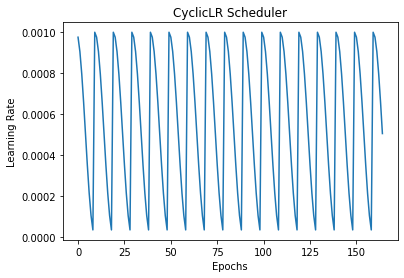

In [2]:
import torch
import math
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.nn.functional as F
import time
import os
import torch.backends.cudnn as cudnn

import matplotlib.pyplot as plt


os.environ["CUDA_VISIBLE_DEVICES"] = '0'                # GPU Number 
start_time = time.time()
batch_size = 128
learning_rate = 0.001
root_dir = 'drive/app/cifar10/'
default_directory = 'drive/app/torch/save_models'

# Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),               # Random Position Crop
    transforms.RandomHorizontalFlip(),                  # right and left flip
    transforms.ToTensor(),                              # change [0,255] Int value to [0,1] Float value
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467), # RGB Normalize MEAN
                         std=(0.2471, 0.2436, 0.2616))  # RGB Normalize Standard Deviation
])

transform_test = transforms.Compose([
    transforms.ToTensor(),                              # change [0,255] Int value to [0,1] Float value
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467), # RGB Normalize MEAN
                         std=(0.2471, 0.2436, 0.2616))  # RGB Normalize Standard Deviation
])

# automatically download
train_dataset = datasets.CIFAR10(root=root_dir,
                                 train=True,
                                 transform=transform_train,
                                 download=True)

test_dataset = datasets.CIFAR10(root=root_dir,
                                train=False,
                                transform=transform_test)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,            # at Training Procedure, Data Shuffle = True
                                           num_workers=4)           # CPU loader number

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,            # at Test Procedure, Data Shuffle = False
                                          num_workers=4)            # CPU loader number


class VGG(nn.Module):

    def __init__(self, num_classes=10):
        super(VGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(512, 512),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(512, 512),
            nn.ReLU(True),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = VGG()

optimizer = optim.SGD(model.parameters(), learning_rate,
                                momentum=0.9,
                                weight_decay=1e-4,
                                nesterov=True)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.00001)
criterion = nn.CrossEntropyLoss()

if torch.cuda.device_count() > 0:
    print("USE", torch.cuda.device_count(), "GPUs!")
    model = nn.DataParallel(model).cuda()
    cudnn.benchmark = True
else:
    print("USE ONLY CPU!")


def train(epoch):
    model.train()
    train_loss = 0 
    total = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        if torch.cuda.is_available():
            data, target = Variable(data.cuda()), Variable(target.cuda())
        else:
            data, target = Variable(data), Variable(target)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(output.data, 1)

        total += target.size(0)
        correct += predicted.eq(target.data).cpu().sum()
        if batch_idx % 10 == 0:
            print('Epoch: {} | Batch_idx: {} |  Loss: ({:.4f}) | Acc: ({:.2f}%) ({}/{})'
                  .format(epoch, batch_idx, train_loss / (batch_idx + 1), 100. * correct / total, correct, total))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        if torch.cuda.is_available():
            data, target = Variable(data.cuda()), Variable(target.cuda())
        else:
            data, target = Variable(data), Variable(target)

        outputs = model(data)
        loss = criterion(outputs, target)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += predicted.eq(target.data).cpu().sum()
    print('# TEST : Loss: ({:.4f}) | Acc: ({:.2f}%) ({}/{})'
          .format(test_loss / (batch_idx + 1), 100. * correct / total, correct, total))


def save_checkpoint(directory, state, filename='latest.tar.gz'):

    if not os.path.exists(directory):
        os.makedirs(directory)

    model_filename = os.path.join(directory, filename)
    torch.save(state, model_filename)
    print("=> saving checkpoint")

def load_checkpoint(directory, filename='latest.tar.gz'):

    model_filename = os.path.join(directory, filename)
    if os.path.exists(model_filename):
        print("=> loading checkpoint")
        state = torch.load(model_filename)
        return state
    else:
        return None

start_epoch = 0

checkpoint = load_checkpoint(default_directory)
if not checkpoint:
    pass
else:
    start_epoch = checkpoint['epoch'] + 1
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])

for epoch in range(start_epoch, 165):

    #if epoch < 80:
    #    lr = learning_rate
    #elif epoch < 120:
    #    lr = learning_rate * 0.1
   # else:
    #    lr = learning_rate * 0.01

    lr = learning_rate
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


    train(epoch)
    save_checkpoint(default_directory, {
        'epoch': epoch,
        'model': model,
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict(),
    })

    test()  

lrs  = []
for i in range(165):
  scheduler.step()
  lrs.append(optimizer.param_groups[0]["lr"])  

plt.plot(lrs)
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("CyclicLR Scheduler")

now = time.gmtime(time.time() - start_time)
print('{} hours {} mins {} secs for training'.format(now.tm_hour, now.tm_min, now.tm_sec))